In [1]:
import pandas as pd
from collections import Counter

from surprise import Dataset
from surprise import Reader

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/Small_Electronics_subset.csv')

In [3]:
df.shape

(6738665, 5)

In [4]:
# Remove duplicates:

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(6532419, 5)

In [7]:
df.head(10)

,asin,overall,reviewerID,reviewerName,verified
0,0151004714,5.0,AAP7PPBU72QFM,D. C. Carrad,True
1,0151004714,3.0,A2E168DTVGE6SV,Evy,True
2,0151004714,5.0,A1ER5AYS3FQ9O3,Kcorn,False
3,0151004714,5.0,A1T17LMQABMBN5,Caf Girl Writes,False
4,0151004714,3.0,A3QHJ0FXK33OBE,W. Shane Schmidt,True
5,0380709473,4.0,A3IYSOTP3HA77N,B. Marks,True
6,0380709473,5.0,A11SXV34PZUQ5E,Tom C.,True
7,0380709473,5.0,A2AUQM1HT2D5T8,ema,True
8,0380709473,5.0,A3UD8JRWLX6SRX,Michael O.,True
9,0380709473,4.0,A3MV1KKHX51FYT,Acute Observer,False


In [8]:
# Number of Products

df['asin'].nunique()

160052

In [9]:
# Number of Users

df['reviewerID'].nunique()

728663

In [10]:
# Number of UnVerified reviews

df[df['verified'] == False]['asin'].count()

671674

In [11]:
df.to_csv('Small_Electronics_subset_removed_duplicates.csv',index=False)

In [12]:
# Average rating and total reviews per product

In [13]:
df1 = pd.DataFrame(df.groupby(['asin']).count()['overall'])

In [14]:
df1['avg_rating'] = list(df.groupby(['asin']).mean()['overall'])

In [15]:
df1.columns = ['counts','avg_rating']

In [16]:
df1.head()

,counts,avg_rating
asin,,
0101635370,32,3.218750
0151004714,5,4.200000
0380709473,6,4.500000
0446697192,11,3.818182
0511189877,36,4.472222


In [17]:
l = df1.shape[0]
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
for i in range(l):
    if df1.iloc[i,1]<=1:
        c1 += 1
    elif df1.iloc[i,1]>1 and df1.iloc[i,1]<=2:
        c2 += 1
    elif df1.iloc[i,1]>2 and df1.iloc[i,1]<=3:
        c3 += 1
    elif df1.iloc[i,1]>3 and df1.iloc[i,1]<=4:
        c4 += 1
    elif df1.iloc[i,1]>4 and df1.iloc[i,1]<=5:
        c5 += 1
ll = [c1,c2,c3,c4,c5]

In [18]:
ll

[28, 602, 7090, 47476, 104856]

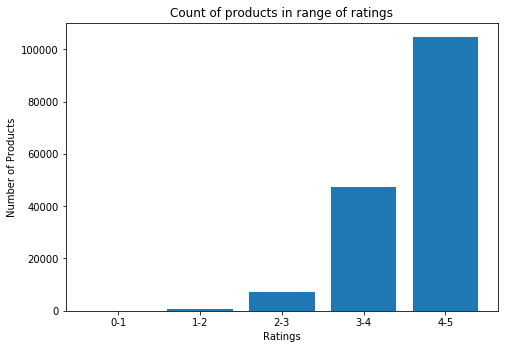

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rate = ['0-1', '1-2', '2-3', '3-4', '4-5']
ax.bar(rate,ll)
ax.set_ylabel("Number of Products")
ax.set_xlabel("Ratings")
ax.set_title('Count of products in range of ratings')
plt.show()

In [20]:
# Total review given by per user 

In [21]:
df2 = pd.DataFrame(df.groupby(['reviewerID']).count()['asin'])

In [22]:
df2['avg_rating'] = pd.DataFrame(df.groupby(['reviewerID']).mean()['overall'])

In [23]:
df2.columns = ['counts','avg_rating']

In [24]:
df2.head()

,counts,avg_rating
reviewerID,,
A0001528BGUBOEVR6T5U,5,4.400000
A0003214FKMKJE0PCW3D,7,5.000000
A0008898NGEXICE0F146,7,5.000000
A00101847G3FJTWYGNQA,11,4.545455
A0014476IZYE2N3XTK4K,4,2.750000


In [25]:
l = df2.shape[0]
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
for i in range(l):
    if df2.iloc[i,1]<=1:
        c1 += 1
    elif df2.iloc[i,1]>1 and df2.iloc[i,1]<=2:
        c2 += 1
    elif df2.iloc[i,1]>2 and df2.iloc[i,1]<=3:
        c3 += 1
    elif df2.iloc[i,1]>3 and df2.iloc[i,1]<=4:
        c4 += 1
    elif df2.iloc[i,1]>4 and df2.iloc[i,1]<=5:
        c5 += 1
ll = [c1,c2,c3,c4,c5]

In [26]:
ll

[1020, 7749, 42823, 187921, 489150]

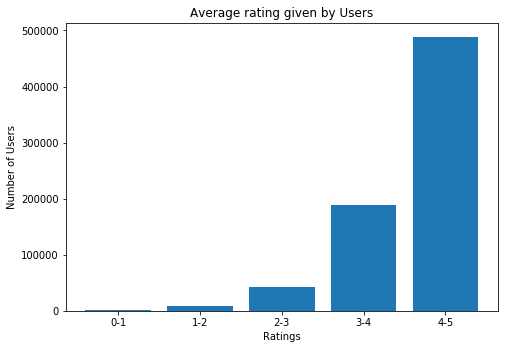

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rate = ['0-1', '1-2', '2-3', '3-4', '4-5']
ax.bar(rate,ll)
ax.set_ylabel("Number of Users")
ax.set_xlabel("Ratings")
ax.set_title('Average rating given by Users')
plt.show()

In [28]:
Counter(df['asin']).most_common()

[('B003L1ZYYW', 8563),
 ('B0019HL8Q8', 7656),
 ('B0019EHU8G', 7302),
 ('B00M55C0NS', 6218),
 ('B00BWF5U0M', 6179),
 ('B00DIF2BO2', 6174),
 ('B000BQ7GW8', 5961),
 ('B00IVPU7AO', 5952),
 ('B00L0YLRUW', 5696),
 ('B0043T7FXE', 5449),
 ('B010OYASRG', 5353),
 ('B006W8U2MU', 5102),
 ('B000HPV3RW', 5101),
 ('B00E055H5O', 5057),
 ('B003MTTJOY', 4823),
 ('B005DKZTMG', 4715),
 ('B0006BB9MG', 4687),
 ('B00BP5KOPA', 4625),
 ('B00004ZCJI', 4521),
 ('B00004ZCJJ', 4521),
 ('B00009KLAE', 4519),
 ('B001TH7GUU', 4436),
 ('B000FNFSPY', 4421),
 ('B00FDUHD2K', 4384),
 ('B005LDLP8W', 4316),
 ('B006JH8T3S', 4005),
 ('B00JX1ZS5O', 3965),
 ('B00CD8AFFW', 3917),
 ('B0043WJRRS', 3824),
 ('B00LLEODCK', 3777),
 ('B009SYZ8OC', 3752),
 ('B009D79VH4', 3746),
 ('B0015DYMVO', 3679),
 ('B007WTAJTO', 3557),
 ('B006GWO5WK', 3549),
 ('B00GHY5JAO', 3521),
 ('B00OAJ412U', 3512),
 ('B00OBRE5UE', 3443),
 ('B00HVT170U', 3431),
 ('B005LJQMCK', 3409),
 ('B000VS4HDM', 3402),
 ('B010MS67ZG', 3323),
 ('B011WBI4S0', 3321),
 ('B005HMKK

In [29]:
# Remove product that has reviews less than particular number

def remove_least_r_product(dataframe,atleast_r):
    l = Counter(dataframe['asin'])
    n = []
    for i in l.keys():
        if l[i] < atleast_r:
            n.append(i)
    dataframe = dataframe[~dataframe['asin'].isin(n)]
    dataframe.reset_index(drop=True, inplace=True)
    return dataframe

In [30]:
df.shape

(6532419, 5)

In [31]:
sample = df.sample(n = 100000) 

In [32]:
dff = remove_least_r_product(sample.copy(),10)

In [33]:
dff.shape

(23653, 5)

In [34]:
dff.head(10)

,asin,overall,reviewerID,reviewerName,verified
0,B004N8ZQKY,5.0,AR3P81AXNO234,M. irving,True
1,B00I0S6SK0,4.0,A2T7R0FCAJL7EK,A.C.,True
2,B001URGQY6,5.0,A3PEQDXTZ0G6XK,ZeroSeVen,True
3,B00E055H5O,4.0,A3ERJ7FB674XYG,Nick,True
4,B005CLPP84,4.0,A16K3CQY7RP7LH,Greg Noll,True
5,B000A6PPOK,5.0,A17N1KUYDNIFC3,jsquared,True
6,B00BALK9CM,5.0,A3SLQ8ZJFW4GAF,Travis Bolt,True
7,B0063705PE,1.0,A3PM0FMRJIYLPB,Diane,True
8,B00GKKI4Q6,3.0,A1B129G514XGJ0,TerisaD,True
9,B000I23TTE,4.0,A1IDTGQR0RKR55,John V Magisano,True


In [1]:
# Collaborative Filtering

In [42]:
###########################################################################################################################

In [56]:
dff[(dff['reviewerID'] == 'A3LXXYBYUHZWS5') & (dff['asin'] == '0511189877')]

,asin,overall,reviewerID,reviewerName,verified


In [57]:
# So user 'A3LXXYBYUHZWS5' has not given any rating to product '0511189877'

# Lets predict the rating of product '0511189877' given by user 'A3LXXYBYUHZWS5'

In [39]:
#########################################################################################################################

In [47]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [55]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(dff[["reviewerID", "asin", "overall"]], reader)

In [45]:
##########################################################

In [51]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.081491,3.266554,0.102890
BaselineOnly,1.081865,0.145634,0.168137
SVD,1.082293,1.542222,0.115838
KNNBaseline,1.083377,9.487720,0.176845
KNNBasic,1.100555,9.471471,0.150602
KNNWithZScore,1.107142,13.452598,0.268510
SlopeOne,1.108329,0.295514,0.078623
KNNWithMeans,1.108397,9.793786,0.086872
CoClustering,1.109817,5.667947,0.104899


In [52]:
# We will go with SVD

In [53]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.0970


1.0969764085305087

In [54]:
preds = algo.predict('A3LXXYBYUHZWS5', '0511189877')
preds.est

4.4177236597327925

In [55]:
Check_preds = algo.predict('A3LXXYBYUHZWS5', '0446697192')
Check_preds.est

4.4177236597327925

In [43]:
###########################################################################################################################

In [35]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(dff[["reviewerID", "asin", "overall"]], reader)

In [36]:
from surprise import KNNWithMeans

In [37]:
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [40]:
trainset, testset = train_test_split(data, test_size=0.25)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1137


1.1137380766079155

In [43]:
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [44]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.082168777392648
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
